In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
train_data = train_datagen.flow_from_directory('DataSet/train',
                                               target_size=(64,64),
                                               class_mode='binary',
                                               batch_size=32)

Found 413 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
test_data = test_datagen.flow_from_directory('DataSet/test',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')

Found 168 images belonging to 2 classes.


In [6]:
model = tf.keras.Sequential()

In [7]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

In [8]:
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))

In [9]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))

In [10]:
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))

In [11]:
model.add(tf.keras.layers.Flatten())

In [12]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
model.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

In [15]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [16]:
J = model.fit(x = train_data,
              validation_data= test_data,
              epochs = 10)

Epoch 1/10
13/13 [==============================] - 7s 552ms/step - loss: 0.6033 - accuracy: 0.7324 - val_loss: 0.8018 - val_accuracy: 0.5833
Epoch 2/10
13/13 [==============================] - 6s 514ms/step - loss: 0.5903 - accuracy: 0.7131 - val_loss: 0.7447 - val_accuracy: 0.5833
Epoch 3/10
13/13 [==============================] - 6s 508ms/step - loss: 0.4791 - accuracy: 0.7487 - val_loss: 0.4388 - val_accuracy: 0.8214
Epoch 4/10
13/13 [==============================] - 6s 495ms/step - loss: 0.4136 - accuracy: 0.7747 - val_loss: 0.6419 - val_accuracy: 0.7024
Epoch 5/10
13/13 [==============================] - 6s 493ms/step - loss: 0.3403 - accuracy: 0.8493 - val_loss: 0.3207 - val_accuracy: 0.8750
Epoch 6/10
13/13 [==============================] - 6s 502ms/step - loss: 0.2496 - accuracy: 0.9010 - val_loss: 0.3709 - val_accuracy: 0.8393
Epoch 7/10
13/13 [==============================] - 6s 497ms/step - loss: 0.2159 - accuracy: 0.9281 - val_loss: 0.5606 - val_accuracy: 0.7381
Epoch 

In [17]:
J.history

{'loss': [0.5895335674285889,
  0.5555312633514404,
  0.4581577777862549,
  0.3735302686691284,
  0.3278810381889343,
  0.2573558986186981,
  0.20158620178699493,
  0.24338850378990173,
  0.16650862991809845,
  0.13214148581027985],
 'accuracy': [0.7336561679840088,
  0.7336561679840088,
  0.7602905631065369,
  0.8135592937469482,
  0.8450363278388977,
  0.8934624791145325,
  0.9273607730865479,
  0.8934624791145325,
  0.9370459914207458,
  0.9491525292396545],
 'val_loss': [0.8017706871032715,
  0.7446638941764832,
  0.43884581327438354,
  0.6418671607971191,
  0.32071131467819214,
  0.3708513379096985,
  0.5606476068496704,
  0.22236685454845428,
  0.1873101443052292,
  0.2523389160633087],
 'val_accuracy': [0.5833333134651184,
  0.5833333134651184,
  0.8214285969734192,
  0.7023809552192688,
  0.875,
  0.8392857313156128,
  0.738095223903656,
  0.9047619104385376,
  0.9166666865348816,
  0.898809552192688]}

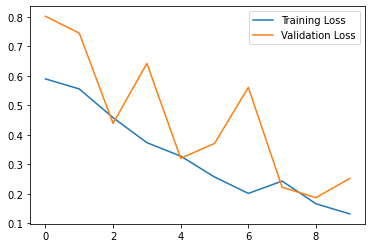

In [20]:
import matplotlib.pyplot as plt
plt.plot(J.history['loss'], label = 'Training Loss')
plt.plot(J.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

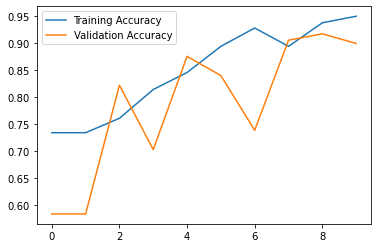

In [21]:
plt.plot(J.history['accuracy'], label = 'Training Accuracy')
plt.plot(J.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

In [22]:
train_data.class_indices

{'Manoj': 0, 'Neeraj': 1}

In [43]:
img = image.load_img('manoj.jpg', target_size=(64,64))

In [44]:
img1 = image.img_to_array(img)

In [45]:
import numpy as np
data = np.expand_dims(img1 , 0)

In [46]:
o = model.predict(data)

In [47]:
def who_is_it(output):
    if output == 0:
        print('Its None other than Manoj!')
    else :
        print('Its None Other than Neeraj!!')

In [48]:
who_is_it(o)

Its None other than Manoj!


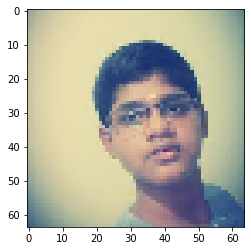

In [49]:
plt.imshow(img)

To note that this image was not in either of the train or test dataset!
And our model have done its Job very Well